# what is it problem 

Given a dataset containing various attributes of fruits (such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality), the task is to develop a predictive model to classify fruit quality as either "good" or "bad." This binary classification problem aims to accurately assess fruit quality based on the provided characteristics

- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit حلاوة
- Crunchiness: Texture indicating the crunchiness of the fruit الصلابة والقرمشة
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit نضج الفاكهة
- Acidity: Acidity level of the fruit مستوي الحموضة
- Quality: Overall quality of the fruit

# import libraries 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# dataset 

In [2]:
dataset=pd.read_csv(r"C:\Users\lap shop\OneDrive\Documents\GDG\apple_quality.csv")
dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


- The dataset was generously provided by an American agriculture company. The data has been scaled and cleaned for ease of use.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
discrete=[]
for col in dataset.columns:
    if dataset[col].dtype=='float64' and len(dataset[col].unique()) <=20:
        discrete.append(col)
discrete

[]

In [5]:
dataset.shape

(4001, 9)

In [6]:
dataset['Acidity'] = pd.to_numeric(dataset['Acidity'], errors='coerce')


In [7]:
dataset.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [8]:
dataset=dataset.drop("A_id",axis=1)
dataset['Quality'] = dataset['Quality'].fillna(dataset['Quality'].mode()[0])


## split dataset

In [9]:
train, val = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['Quality'])



In [10]:
print (train.shape)
print (val.shape)

(3200, 8)
(801, 8)


In [11]:
train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
337,-1.011533,2.308289,1.705463,3.094887,1.411367,-5.199663,2.621552,good
1096,-0.930772,-1.130286,1.215035,-0.592831,-1.575231,0.259948,-1.200660,bad
1799,-1.622328,2.266139,-0.260213,0.881820,1.834090,-1.351047,2.706358,bad
3714,-2.376222,1.705030,-1.029886,0.125125,1.142984,-0.385940,-4.856291,good
588,-2.076145,-0.275632,-1.066856,3.079851,-2.318860,-1.946524,-1.115163,bad
...,...,...,...,...,...,...,...,...
2812,-3.377694,2.053683,0.794257,-3.528962,-2.071871,1.137396,-4.110373,good
1645,0.376423,-0.511875,1.625465,-0.939925,0.304956,-1.381506,3.283155,good
3287,0.918145,-4.232359,0.549290,-1.407726,3.322634,-1.007526,2.381795,good
573,3.504741,-5.478682,-1.548666,-0.720534,1.908383,1.910573,2.445014,good


# data analytics

## target

In [12]:
train['Quality'].describe()


count     3200
unique       2
top       good
freq      1604
Name: Quality, dtype: object

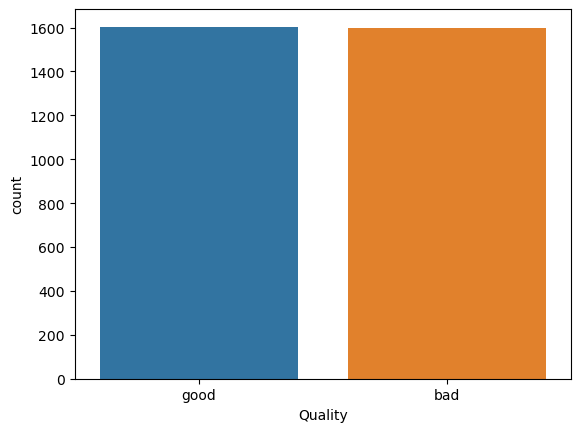

In [13]:
count=sns.countplot(x=train["Quality"])


In [14]:
print('bad', round(train['Quality'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('good', round(train['Quality'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

bad 50.12 % of the dataset
good 49.88 % of the dataset


In [15]:
train['Quality'] = train['Quality'].map({'bad': 0, 'good': 1})
val['Quality'] = val['Quality'].map({'bad': 0, 'good': 1})


- dataset is balanced 

## feautres 

### numircal feats

In [16]:
numerical_cols= dataset.select_dtypes(exclude=object)
numerical_cols

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796


### univrate analysis

C:\Users\lap shop\AppData\Local\Temp\ipykernel_11568\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_11568\264624390.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\lap shop\AppData\Local\Temp\ipykernel_11568\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

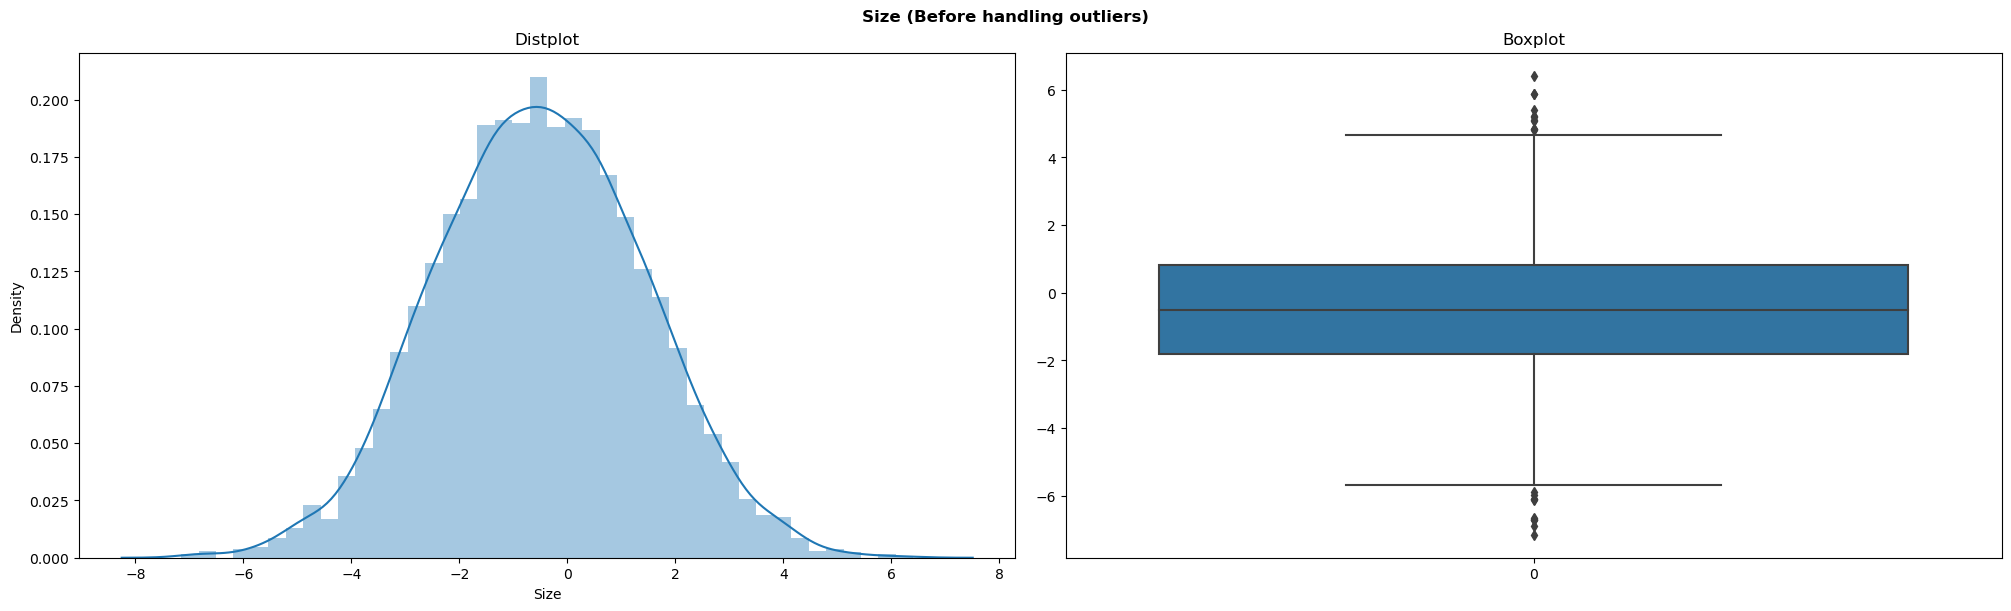

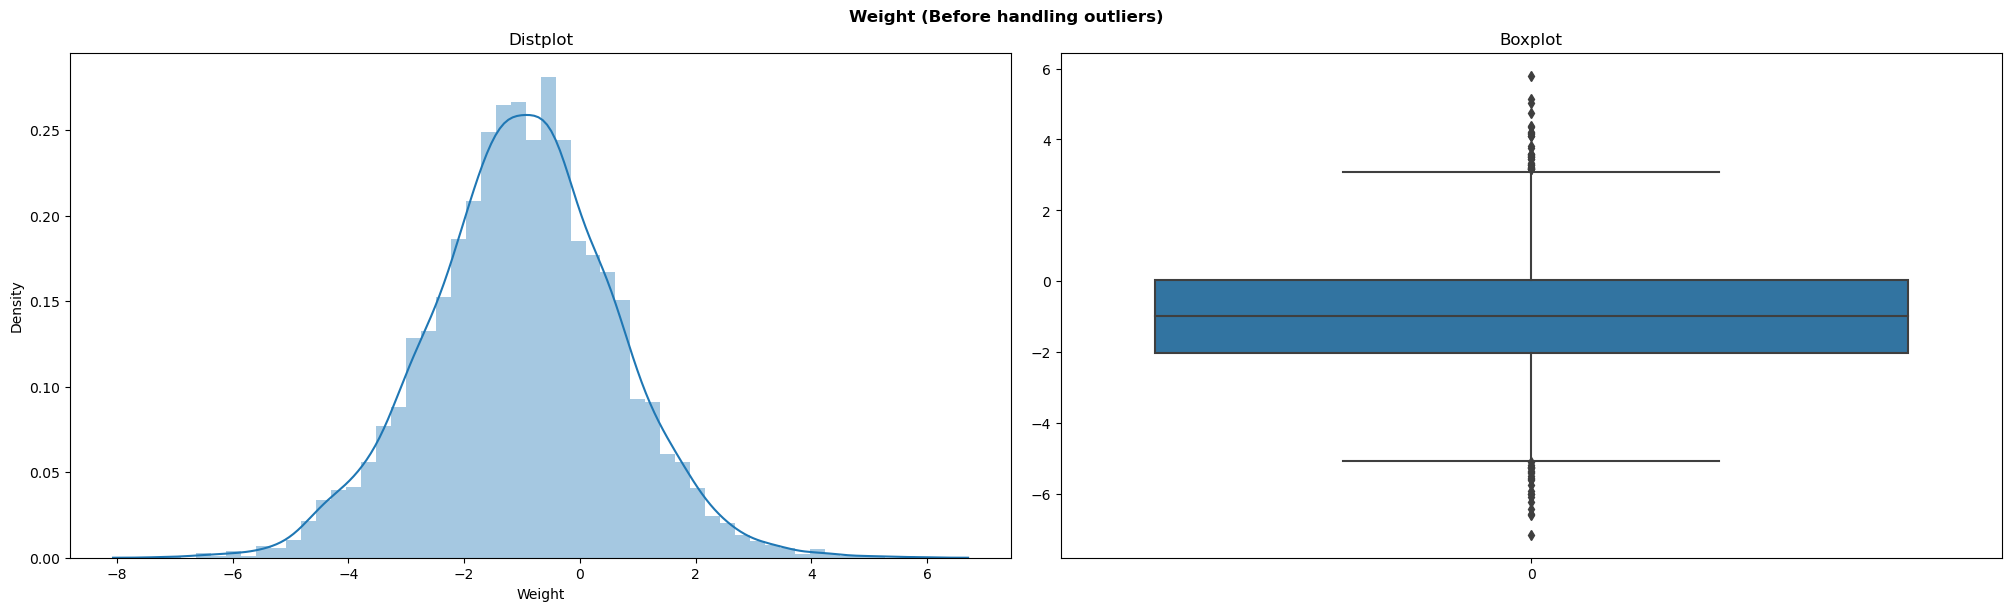

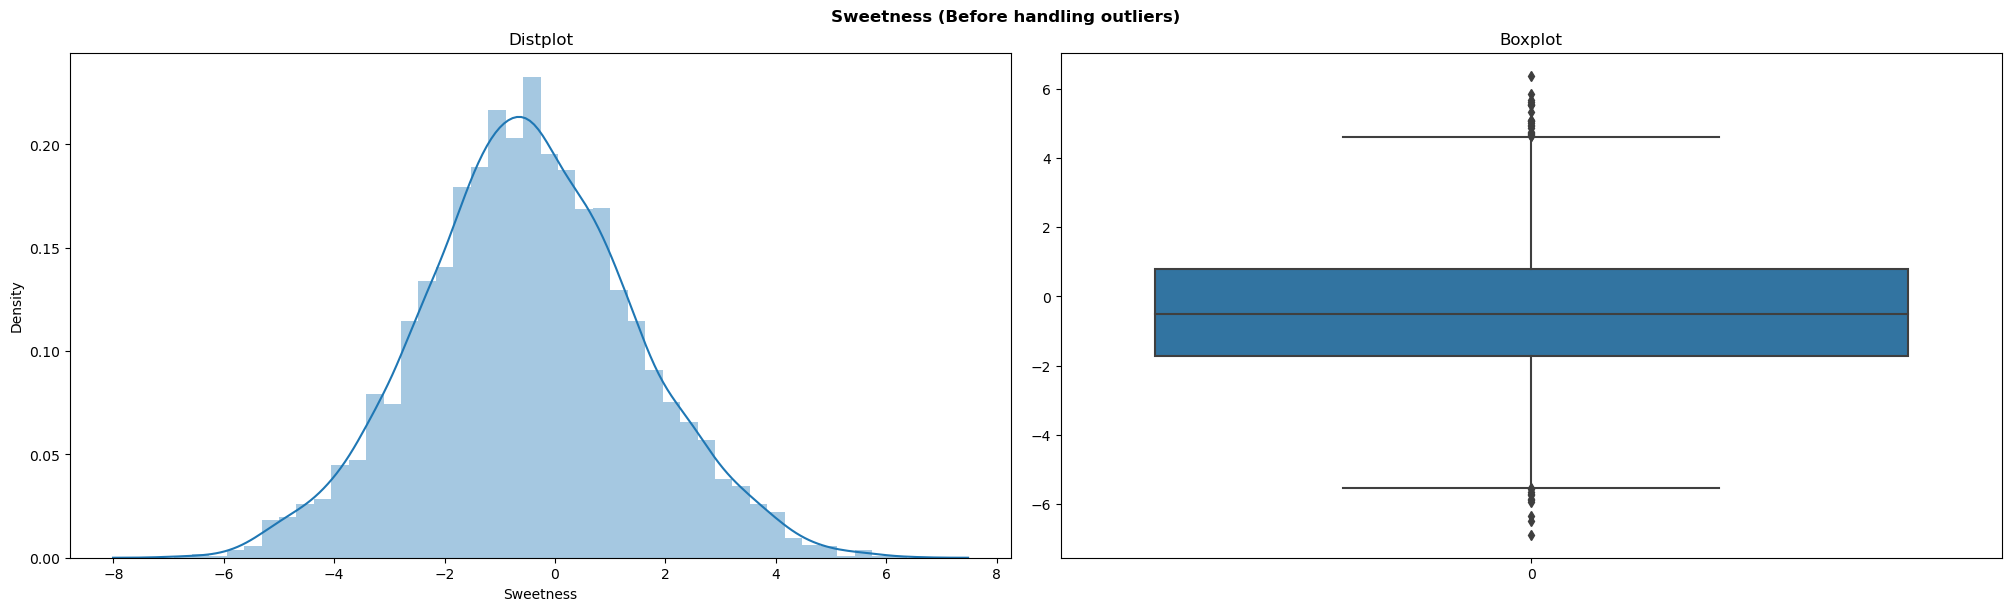

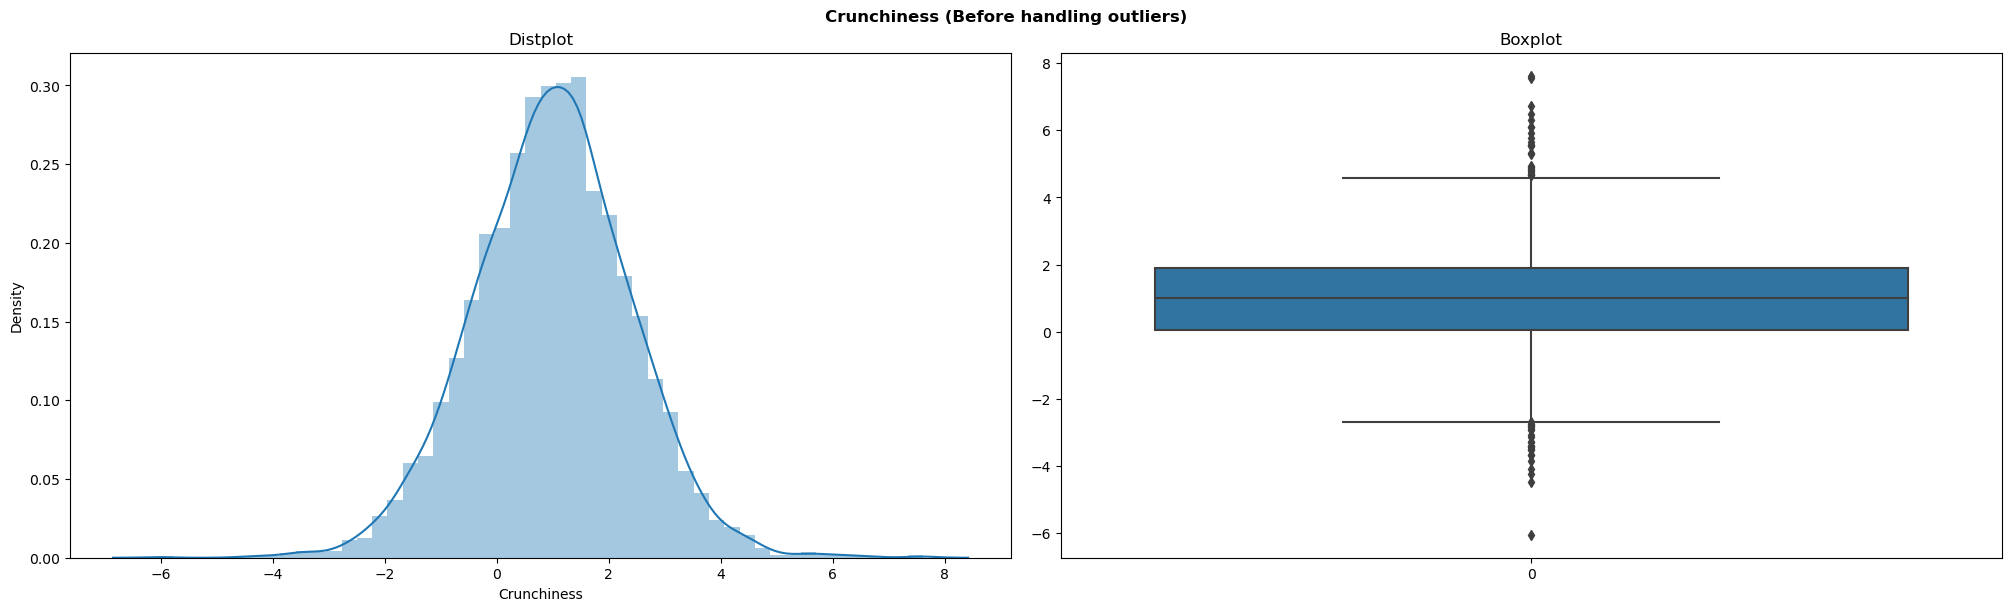

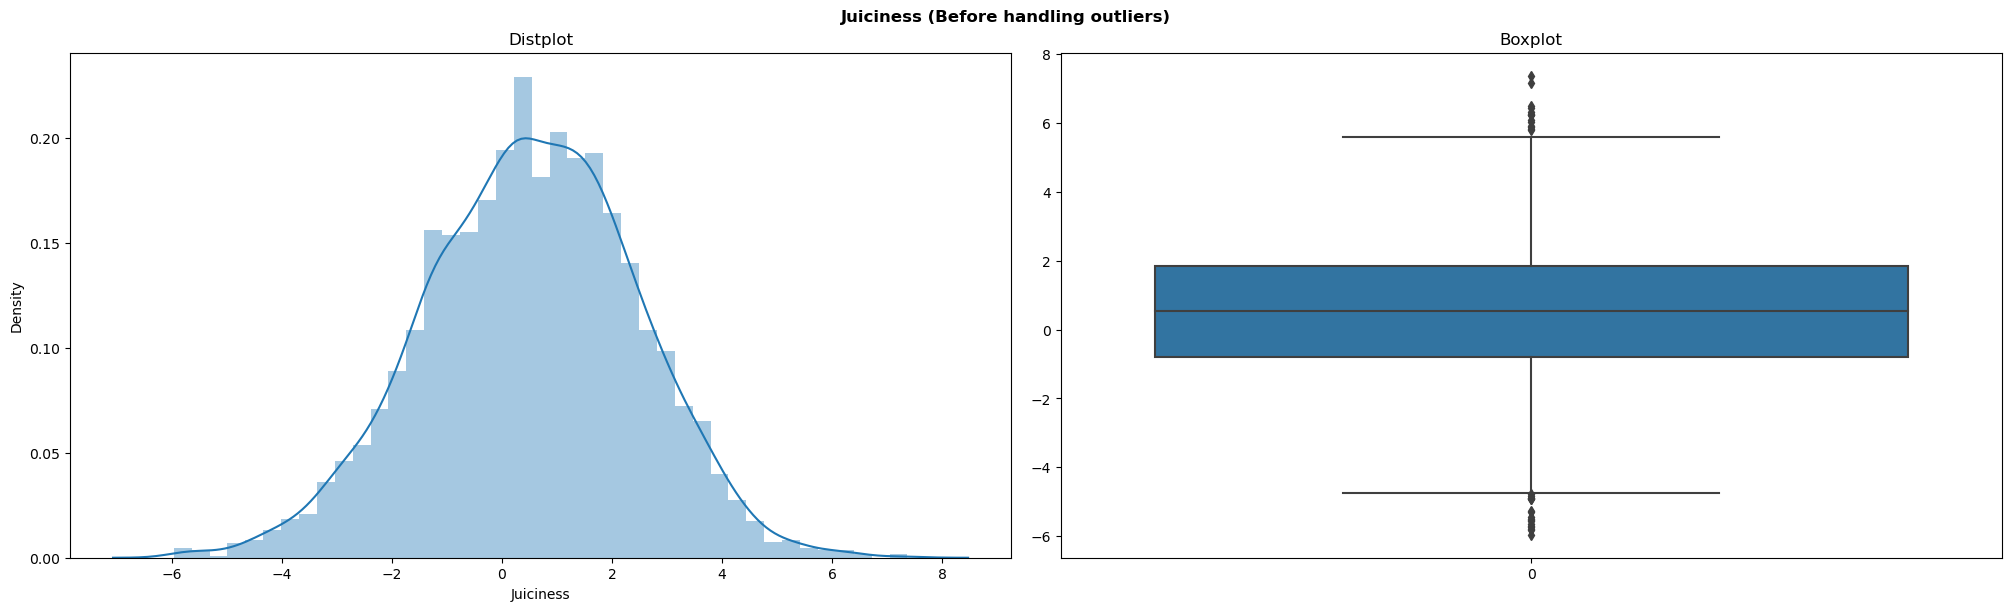

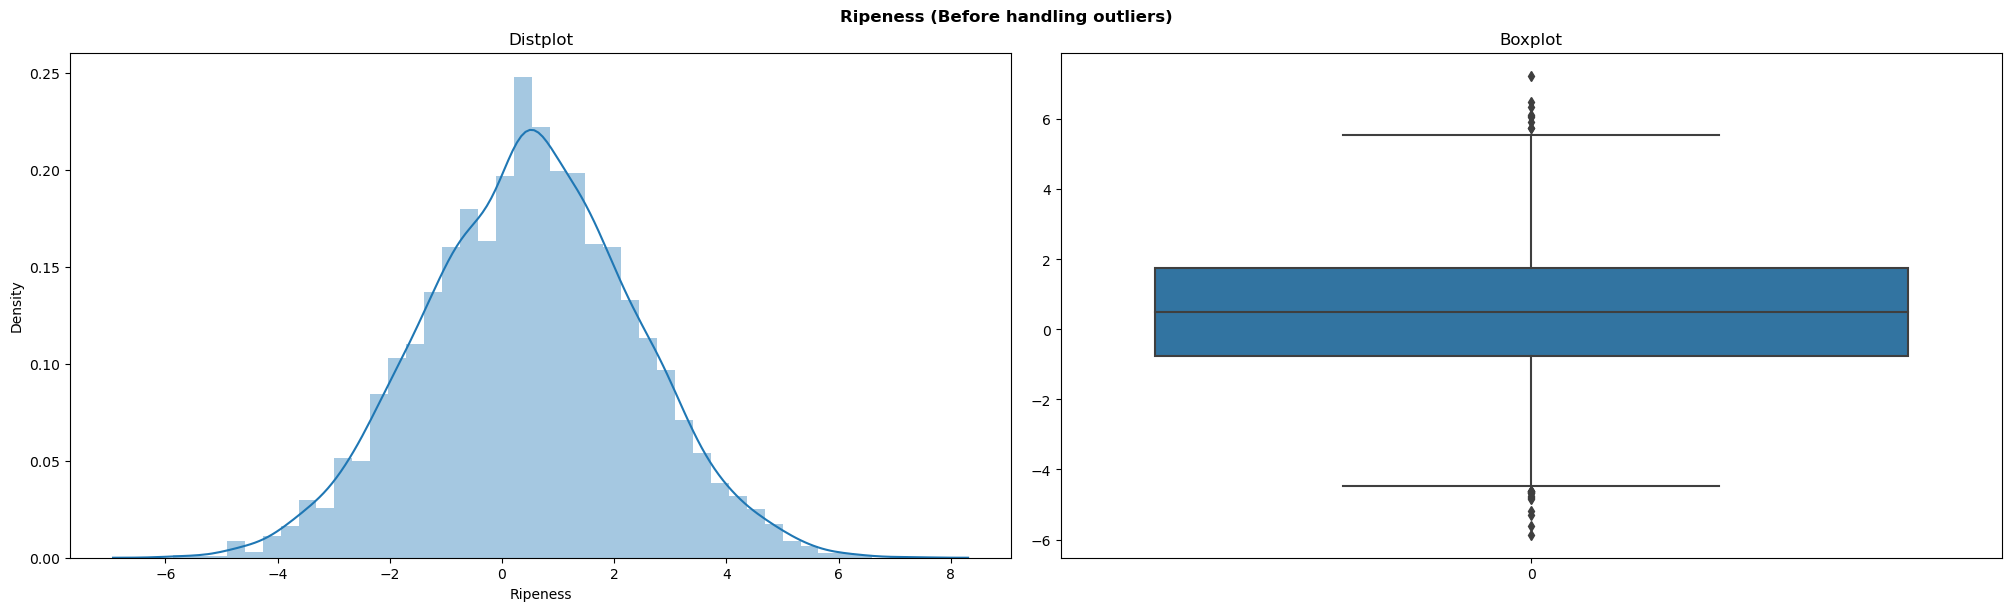

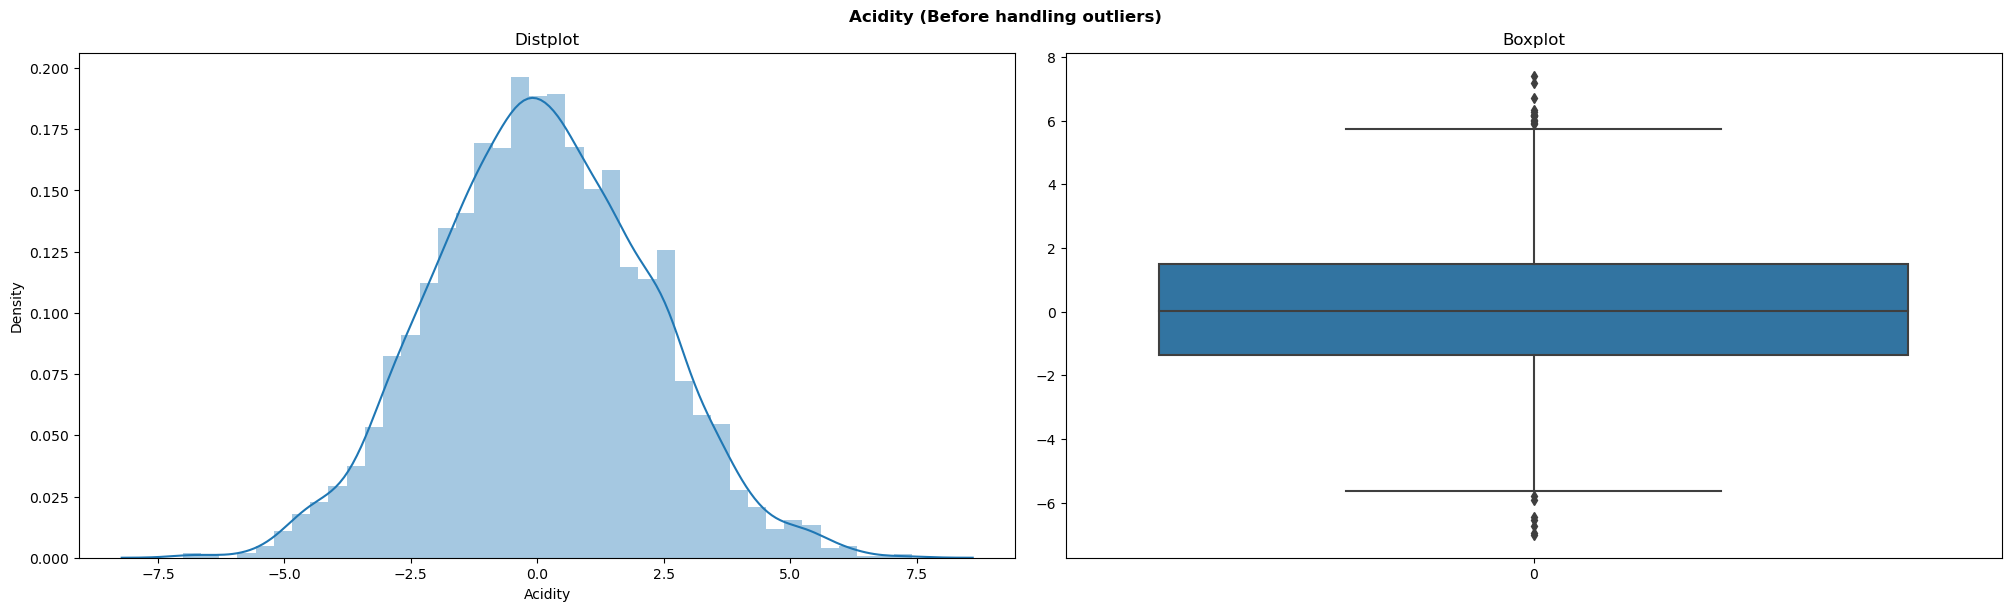

In [17]:
for col in numerical_cols:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(dataset[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [18]:
train['Size'].describe()

count    3199.000000
mean       -0.497357
std         1.912880
min        -7.151703
25%        -1.800751
50%        -0.491809
75%         0.783030
max         6.406367
Name: Size, dtype: float64

In [19]:
train['Weight'].describe()

count    3199.000000
mean       -0.997803
std         1.595829
min        -7.149848
25%        -2.023223
50%        -0.976954
75%         0.032180
max         5.149000
Name: Weight, dtype: float64

In [20]:
train['Sweetness'].describe()

count    3199.000000
mean       -0.479901
std         1.939781
min        -6.359749
25%        -1.746763
50%        -0.511342
75%         0.815060
max         6.374916
Name: Sweetness, dtype: float64

In [21]:
train['Crunchiness'].describe()

count    3199.000000
mean        0.984492
std         1.402718
min        -6.055058
25%         0.079072
50%         0.994916
75%         1.892427
max         7.619852
Name: Crunchiness, dtype: float64

In [22]:
train['Juiciness'].describe()

count    3199.000000
mean        0.503679
std         1.960512
min        -5.961897
25%        -0.819029
50%         0.514416
75%         1.838770
max         7.364403
Name: Juiciness, dtype: float64

In [23]:

train['Ripeness'].describe()

count    3199.000000
mean        0.500120
std         1.872579
min        -5.864599
25%        -0.766701
50%         0.518143
75%         1.751077
max         7.237837
Name: Ripeness, dtype: float64

- i shouw it need to scaliing only 

### binary analysis

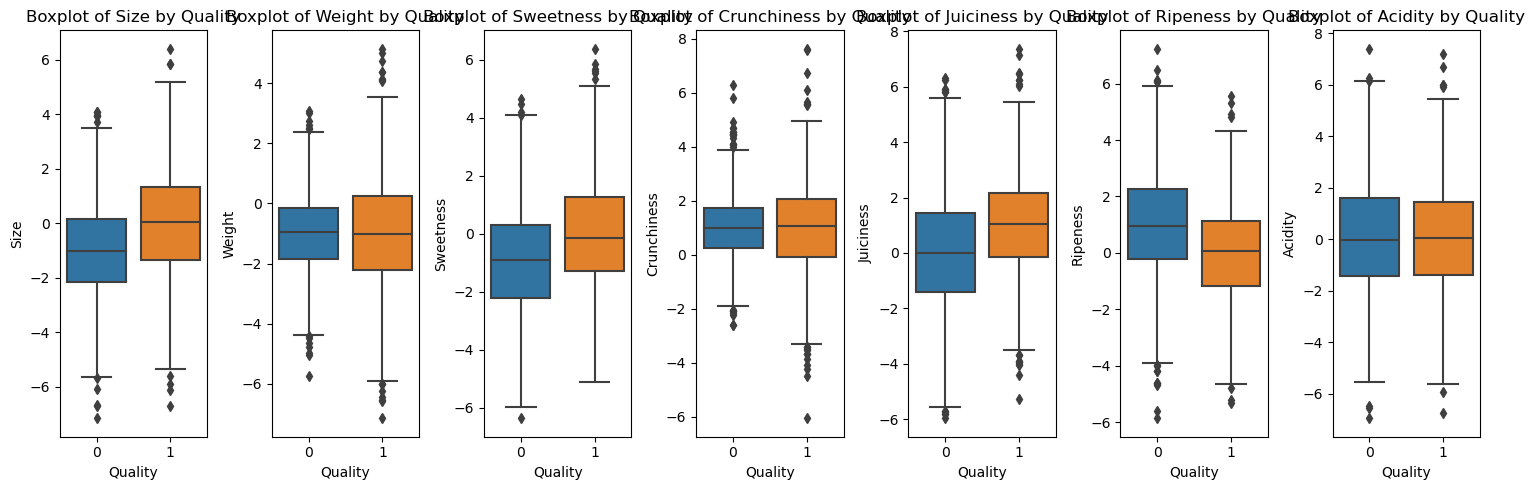

In [24]:
fig, axes = plt.subplots(1, len(numerical_cols.columns), figsize=(15, 5))
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x='Quality', y=col, data=train, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Quality')

plt.tight_layout()
plt.show()

# handle miising value

In [25]:
train.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        0
dtype: int64

In [26]:
val.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [27]:
# Fill missing values in 'Quality' column with the mode
for_Quality = train['Quality'].mode()[0]  # Getting the first mode value
train['Quality'] = train['Quality'].fillna(for_Quality)

# List of numerical columns that need to have missing values filled with the median
columns_to_fill = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Fill missing values with the median for each column in the list
for col in columns_to_fill:
    train[col] = train[col].fillna(train[col].median())


In [28]:
train.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [29]:
val.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [30]:
X_train = train.drop(columns=['Quality'])  # Drop the target column
y_train = train['Quality']  # Target column

# Split val dataset into X_val (features) and y_val (target)
X_val = val.drop(columns=['Quality'])  # Drop the target column
y_val = val['Quality']  # Target column

# modeling and evalutions

In [31]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Use X_val for validation data

poly = PolynomialFeatures(degree=8, include_bias=True)  
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Step 3: Build and train the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) 
# Step 4: Make Predictions for Naive Bayes Model
y_train_nb_pred = nb_model.predict(X_train)  
y_val_nb_pred = nb_model.predict(X_val) 

print("Naive Bayes Model - Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_nb_pred):.4f}")
print("Classification Report:\n", classification_report(y_train, y_train_nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_nb_pred))

print("\nNaive Bayes Model - Validation Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_nb_pred):.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_nb_pred))


lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga', penalty='l2')
lr_model.fit(X_train_poly, y_train)  # Fit the Logistic Regression model on the polynomial features

y_train_lr_pred = lr_model.predict(X_train_poly)  # Predictions on training data
y_val_lr_pred = lr_model.predict(X_val_poly)  # Predictions on validation data

print("\nLogistic Regression Model - Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_lr_pred):.4f}")
print("Classification Report:\n", classification_report(y_train, y_train_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_lr_pred))

print("\nLogistic Regression Model - Validation Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_lr_pred):.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_lr_pred))


Naive Bayes Model - Training Set Evaluation:
Accuracy: 0.7525
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1596
           1       0.75      0.75      0.75      1604

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200

Confusion Matrix:
 [[1203  393]
 [ 399 1205]]

Naive Bayes Model - Validation Set Evaluation:
Accuracy: 0.7453
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       400
           1       0.74      0.77      0.75       401

    accuracy                           0.75       801
   macro avg       0.75      0.75      0.75       801
weighted avg       0.75      0.75      0.75       801

Confusion Matrix:
 [[290 110]
 [ 94 307]]

Logistic Regression Model - Training Set Evaluation:
Accuracy: 0.8609
Classificati